<font color = 'orange'>

# Song Recommendation System
</font>

- use k-means clustering to group songs into distinct clusters based on features
- aggregate features of songs in playlist and assign to nearest cluster
- use k-nearest neighbors to find similar songs within identified cluster
- generate list of recommended songs

In [169]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

In [170]:
# load dataset
songs = pd.read_csv('data/SpotifyFeatures.csv')
songs.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [171]:
# retrieve shape of dataset
songs.shape

(232725, 18)

In [172]:
# check for null values
songs.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [173]:
# drop rows with null values
songs = songs.dropna().reset_index(drop=True)
songs.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [174]:
# check for duplicates
songs.duplicated().sum()

0

In [175]:
# check datatypes
songs.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [176]:
# retrieve descriptive stats
songs.describe(include='all')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,232724,232724,232724,232724,232724.000000,232724.000000,232724.000000,2.327240e+05,232724.000000,232724.000000,232724,232724.000000,232724.000000,232724,232724.000000,232724.000000,232724,232724.000000
unique,27,14564,148614,176773,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,Comedy,Giuseppe Verdi,Home,0wY9rA9fJkuESyYm9uzVK5,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,9681,1394,100,8,NaN,NaN,NaN,NaN,NaN,NaN,27583,NaN,NaN,151743,NaN,NaN,200759,NaN
mean,NaN,NaN,NaN,NaN,41.127490,0.368562,0.554366,2.351218e+05,0.570958,0.148302,NaN,0.215010,-9.569896,NaN,0.120765,117.666494,NaN,0.454919
std,NaN,NaN,NaN,NaN,18.189986,0.354768,0.185608,1.189359e+05,0.263456,0.302769,NaN,0.198273,5.998215,NaN,0.185519,30.898942,NaN,0.260065
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,29.000000,0.037600,0.435000,1.828562e+05,0.385000,0.000000,NaN,0.097400,-11.771000,NaN,0.036700,92.959000,NaN,0.237000
50%,NaN,NaN,NaN,NaN,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,NaN,0.128000,-7.762000,NaN,0.050100,115.777500,NaN,0.444000
75%,NaN,NaN,NaN,NaN,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,NaN,0.264000,-5.501000,NaN,0.105000,139.054500,NaN,0.660000


-  `key`, `mode` need to be mapped
- `time_signature` needs to be sliced
- `popularity`, `duration_ms`, `loudness`, `tempo` need to be scaled
- `genre` needs to be one hot encoded

In [177]:
# retrieve any song
songs[(songs['track_name'] == '6 Foot 7 Foot') & (songs['artist_name'] == 'Lil Wayne')].reset_index(drop=True)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Hip-Hop,Lil Wayne,6 Foot 7 Foot,0z5ZPs57J2KERwM1tBM2GF,71,0.000707,0.365,248587,0.751,0.0,D,0.318,-5.429,Major,0.304,79.119,4/4,0.604
1,Rap,Lil Wayne,6 Foot 7 Foot,0z5ZPs57J2KERwM1tBM2GF,71,0.000707,0.365,248587,0.751,0.0,D,0.318,-5.429,Major,0.304,79.119,4/4,0.604
2,Pop,Lil Wayne,6 Foot 7 Foot,0z5ZPs57J2KERwM1tBM2GF,71,0.000707,0.365,248587,0.751,0.0,D,0.318,-5.429,Major,0.304,79.119,4/4,0.604


- the dataset appears to have duplicate entries for songs categorised multiple genres
- to one hot encode genre and group each song by track_id during feature engineering

<br><br>

## Feature engineering

In [178]:
# define mapping for certain features
key_mapping = {
    'C' : 0,
    'C#': 1,
    'D': 2,
    'D#': 3,
    'E': 4,
    'F': 5,
    'F#': 6,
    'G': 7,
    'G#': 8,
    'A': 9,
    'A#': 10,
    'B': 11
}

mode_mapping = {
    'Minor': 0,
    'Major': 1
}

# remap features
songs['key'] = songs['key'].map(key_mapping)
songs['mode'] = songs['mode'].map(mode_mapping)

In [179]:
# slice features
songs['time_signature'] = songs['time_signature'].apply(lambda x: int(x[:-2]))

In [180]:
# scale features
features_to_scale = ['popularity', 'duration_ms', 'loudness', 'tempo']
features_scaled = pd.DataFrame(MinMaxScaler().fit_transform(songs[features_to_scale]), columns=features_to_scale)
songs_scaled = pd.concat([songs.drop(columns=features_to_scale), features_scaled], axis=1)

In [181]:
# one hot encoded features
features_to_encode = songs_scaled[['genre']]

encoder = OneHotEncoder(sparse_output=False)
features_encoded = encoder.fit_transform(features_to_encode)
features_encoded_df = pd.DataFrame(features_encoded, columns=encoder.get_feature_names_out())

songs_final = pd.concat([songs_scaled.drop(columns='genre'), features_encoded_df], axis=1)

In [182]:
# retrieve the column list
songs_final.columns

Index(['artist_name', 'track_name', 'track_id', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'mode', 'speechiness',
       'time_signature', 'valence', 'popularity', 'duration_ms', 'loudness',
       'tempo', 'genre_A Capella', 'genre_Alternative', 'genre_Anime',
       'genre_Blues', 'genre_Children's Music', 'genre_Children’s Music',
       'genre_Classical', 'genre_Comedy', 'genre_Country', 'genre_Dance',
       'genre_Electronic', 'genre_Folk', 'genre_Hip-Hop', 'genre_Indie',
       'genre_Jazz', 'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B',
       'genre_Rap', 'genre_Reggae', 'genre_Reggaeton', 'genre_Rock',
       'genre_Ska', 'genre_Soul', 'genre_Soundtrack', 'genre_World'],
      dtype='object')

In [185]:
# group songs by track_id and summing up the encoded features to account for multiple genres
songs_final = songs_final.groupby('track_id', as_index=False).agg({
    'artist_name': 'min',
    'track_name': 'min',
    'acousticness': 'min',
    'danceability': 'min',
    'energy': 'min',
    'instrumentalness': 'min',
    'key': 'min',
    'liveness': 'min',
    'mode': 'min',
    'speechiness': 'min',
    'time_signature': 'min',
    'valence': 'min',
    'popularity': 'min',
    'duration_ms': 'min',
    'loudness': 'min',
    'tempo': 'min',
    'genre_A Capella': 'max',
    'genre_Anime': 'max',
    'genre_Blues': 'max',
    'genre_Children\'s Music': 'max',
    'genre_Children’s Music': 'max',
    'genre_Classical': 'max',
    'genre_Comedy': 'max',
    'genre_Country': 'max',
    'genre_Dance': 'max',
    'genre_Electronic': 'max',
    'genre_Folk': 'max',
    'genre_Hip-Hop': 'max',
    'genre_Indie': 'max',
    'genre_Jazz': 'max',
    'genre_Movie': 'max',
    'genre_Opera': 'max',
    'genre_Pop': 'max',
    'genre_R&B': 'max',
    'genre_Rap': 'max',
    'genre_Reggae': 'max',
    'genre_Reggaeton': 'max',
    'genre_Rock': 'max',
    'genre_Ska': 'max',
    'genre_Soul': 'max',
    'genre_World': 'max'
}).reset_index(drop=True)

In [194]:
# initialise hypothetical playlist for generating recommendations later
track_list = ['\'Till I Collapse', '6 Foot 7 Foot', 'A Milli', 'm.A.A.d city', 'Lose Yourself', 'No Apologies', 'HUMBLE.', 'Bonfire', 'Gin And Juice (feat. Dat Nigga Daz)']
artist_list = ['Eminem', 'Lil Wayne', 'Kendrick Lamar', 'Childish Gambino', 'Snoop Dogg']

playlist = songs_final[(songs_final['track_name'].isin(track_list)) & (songs_final['artist_name'].isin(artist_list))].reset_index(drop=True)
playlist

,track_id,artist_name,track_name,acousticness,danceability,energy,instrumentalness,key,liveness,mode,...,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_World,cluster
0,0WKYRFtH6KKbaNWjsxqm70,Snoop Dogg,Gin And Juice (feat. Dat Nigga Daz),0.028500,0.549,0.853,0.000296,7,0.6180,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0z5ZPs57J2KERwM1tBM2GF,Lil Wayne,6 Foot 7 Foot,0.000707,0.365,0.751,0.000000,2,0.3180,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23
2,1WMNEgUbRMGOf4GkPYu1wf,Eminem,No Apologies,0.017100,0.538,0.730,0.000000,9,0.1030,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
3,439TlnnznSiBbQbgXiBqAd,Kendrick Lamar,m.A.A.d city,0.053800,0.487,0.729,0.000004,2,0.4400,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23
4,4xkOaSrkexMciUUogZKVTS,Eminem,'Till I Collapse,0.075700,0.572,0.853,0.000000,1,0.0798,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23
5,6ScJMrlpiLfZUGtWp4QIVt,Lil Wayne,A Milli,0.052700,0.679,0.684,0.000895,6,0.1770,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25
6,77Ft1RJngppZlq59B6uP0z,Eminem,Lose Yourself,0.009220,0.689,0.735,0.000720,2,0.3650,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
7,799f6Ih1Pu4AUApMyXhxUc,Childish Gambino,Bonfire,0.059400,0.506,0.745,0.000000,8,0.3410,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20
8,7KXjTSCq5nL1LoYtL7XAwS,Kendrick Lamar,HUMBLE.,0.000282,0.908,0.621,0.000054,1,0.0958,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23


<br><br>

## Find optimal clusters with inertia scores

In [195]:
# create a subset that only includes features
songs_features = songs_final.drop(columns=['artist_name', 'track_name', 'track_id'])
songs_features.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,mode,speechiness,time_signature,valence,...,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_World,cluster
0,0.234,0.617,0.862,0.976000,7,0.1410,1,0.0514,4,0.886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.249,0.518,0.805,0.000000,5,0.3330,1,0.0407,4,0.841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2,0.366,0.631,0.513,0.000004,2,0.1090,1,0.0293,4,0.307,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24
3,0.815,0.768,0.137,0.922000,1,0.1130,0,0.0747,4,0.560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,0.131,0.748,0.627,0.000000,7,0.0852,1,0.0644,4,0.524,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [196]:
# define function to calculate inertia scores for evaluation
def kms_evaluation(num_clusters, feature):
    inertia = []
    
    for k in num_clusters:
        kms = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(feature)
        inertia.append(kms.inertia_)

    return inertia

# get list of inertia scores
num_clusters = [i for i in range(2, 40)]
inertia = kms_evaluation(num_clusters, songs_features)

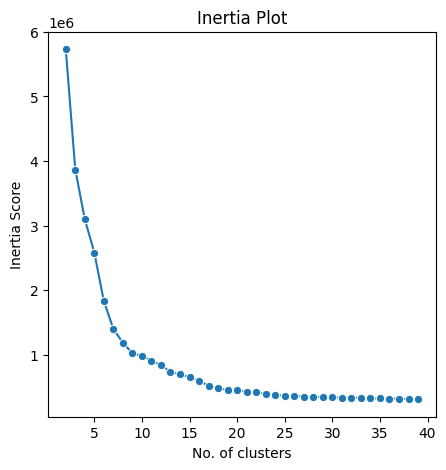

In [197]:
# plot the inertia scores
plt.figure(figsize=(5, 5))

sns.lineplot(x=num_clusters, y=inertia, marker='o')

plt.title("Inertia Plot")
plt.xlabel("No. of clusters")
plt.ylabel("Inertia Score")

plt.show()

- let's try using 30 clusters

<br><br>

## Fit kmeans model with optimal clusters

In [198]:
# initialise and fit kmeans model
kms = KMeans(n_clusters=30, n_init='auto', random_state=42)
kms.fit(songs_features)

# create a column that specifies the cluster a song is grouped into
songs_final['cluster'] = kms.labels_

In [199]:
# retrieve and aggregate features of songs in playlist
playlist_features = playlist.drop(columns=['track_name', 'artist_name', 'track_id'])
playlist_agg = playlist_features.mean().to_frame().T

# assign the aggregated features to the nearest cluster
playlist_agg['cluster'] = kms.predict(playlist_agg)

<br><br>

## Generate song recommendations with knn

In [200]:
# initialise knn and instantiate recommended songs list
num_neighbors = 10
knn = NearestNeighbors(n_neighbors=(num_neighbors + len(playlist)))
recommended_songs = []

# create a loop that runs until the list has n number of recommended songs
while len(recommended_songs) < num_neighbors:
    for index, playlist_song in playlist_agg.iterrows():
        cluster_id = playlist_song['cluster']

        # retrieve songs that are in the same cluster as playlist
        cluster_songs = songs_final[songs_final['cluster'] == cluster_id]
        cluster_songs_features = cluster_songs.drop(columns=['track_id', 'track_name', 'artist_name', 'cluster'])
        knn.fit(cluster_songs_features)

        # find the nearest neighbors
        playlist_agg_features = playlist_agg.drop(columns='cluster').iloc[index].values.reshape(1, -1)
        distances, indices = knn.kneighbors(playlist_agg_features)

        # add songs that are not already in the playlist into recommendations
        for idx in indices[0]:
            recommended_song = cluster_songs.iloc[idx]
            if recommended_song['track_id'] not in list(playlist['track_id']):
                recommended_songs.append(recommended_song)
            if len(recommended_songs) >= num_neighbors:
                break
        
        if len(recommended_songs) >= num_neighbors:
            break
            
recommended_songs_df = pd.DataFrame(recommended_songs).drop_duplicates().reset_index(drop=True)
recommended_songs_df

,track_id,artist_name,track_name,acousticness,danceability,energy,instrumentalness,key,liveness,mode,...,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_World,cluster
0,5o4Kal1PbEg8VbVjDoCx80,Yella Beezy,What I Did (feat. Kevin Gates),0.000397,0.449,0.684,0.000000,4,0.3660,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,7J6bnDDitOwfelaJNixHhL,Huncho Jack,Modern Slavery,0.001580,0.737,0.737,0.000000,4,0.2800,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1PQAocUDoT1Q90Sabu1MTu,J. Cole,Is She Gon Pop,0.082600,0.547,0.747,0.000015,4,0.2310,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2QJnTfMpNG05KFf2E3gVIJ,Wiz Khalifa,Go Hard or Go Home,0.002930,0.651,0.741,0.000012,4,0.2170,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,3uYm4MtU6jUQft2DtGqEoZ,Mac Miller,Knock Knock,0.035300,0.667,0.922,0.000000,4,0.3640,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,6IZvVAP7VPPnsGX6bvgkqg,Kendrick Lamar,PRIDE.,0.078600,0.665,0.535,0.000017,4,0.1540,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,3BtuIIrQlkujKPuWF2B85z,Drake,Too Good,0.066200,0.820,0.641,0.000051,4,0.1020,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,7cg9Dl8Erx5V0fIAHcP0XX,Yella Beezy,"That's On Me (Remix) (feat. 2 Chainz, T.I., Ri...",0.019300,0.827,0.623,0.000000,4,0.0589,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,46MFlm7p0Vqd0eXmLtDlN4,The Game,100 (feat. Drake),0.013600,0.801,0.521,0.000000,4,0.1790,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,4BHzHISX21PYwGXiBEUQ70,Migos,BBO (Bad Bitches Only),0.044000,0.804,0.774,0.000001,4,0.2170,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<br><br>

<font color = 'orange'>

## Summary

</font>

- developed a song recommendation system that captures the overall mood and vibe of a playlist and suggests songs that align with it
- possible areas for future exploration
    - cluster playlist songs individually rather than collectively to avoid information loss during aggregation and reduce bias in diverse playlists
    - include additional song features in API calls for clustering, such as language and release year
    - recommend additional songs by the same artists featured in the playlist
    - try out other models

<br><br><br><br>

# Metadata

- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `duration_ms`: The duration of the track in milliseconds.

- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- `loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- `time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<br>

# Acknowledgements
* data courtesy of Spotify, provided via [Spotify Tracks DB](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db/data) on Kaggle